In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
# (tinklo) žingsnis: τ, h
# σ - ta konstanta prie k_n

In [3]:
def RungeKutta4(fn, u0, tau=1e-5, lower_bound = 0, upper_bound=1):
  ys = [u0]
  ts = np.arange(lower_bound, upper_bound + tau, tau)

  for t_n in ts[:-1]:
    y_ = ys[-1]
    k1 = fn(t_n,         y_         )
    k2 = fn(t_n + tau/2, y_ + tau*k1/2)
    k3 = fn(t_n + tau/2, y_ + tau*k2/2)
    k4 = fn(t_n + tau,   y_ + tau*k3  )
    y_ = y_ + tau/6*(k1 + 2*k2 + 2*k3 + k4)
    ys.append(y_)

  return (ts, ys)

In [ ]:
def RungeKutta2(fn, u0=1, lower_bound=0, upper_bound=1, tau=0.1):
  y = [u0]
  ts = np.arange(lower_bound, upper_bound + tau, tau)

  for t_n in ts[:-1]:
    k1 = fn(t_n, y[-1])
    k2 = fn(t_n + tau, y[-1] + tau * k1)
    y_n_plus_one = y[-1] + (tau/2) * (k1 + k2)
    y.append(y_n_plus_one)

  return ts, y

In [5]:
def SciPy(fn, u0 = 1, lower_bound = 0, upper_bound = 1, tau = 0.05):
  ts = np.arange(lower_bound, upper_bound + tau, tau)
  sol = solve_ivp(fn, (lower_bound, upper_bound), [u0], t_eval=ts)
  return ts, sol['y'][0]


In [6]:
# u' = x^2 ln(u+x) − x
# u' = f(x, u)
f = lambda x, u: np.pow(x, 2) * np.log(u + x) - x

In [7]:
ts1, rk4_ys1 = RungeKutta4(f, u0 = 1, tau = 0.05)
ts2, rk4_ys2 = RungeKutta4(f, u0 = 1, tau = 0.1)

ts1, rk2_ys1 = RungeKutta2(f, u0 = 1, tau = 0.05)
ts2, rk2_ys2 = RungeKutta2(f, u0 = 1, tau = 0.1)

_, scipy1 = SciPy(f, u0 = 1, tau = 0.05)

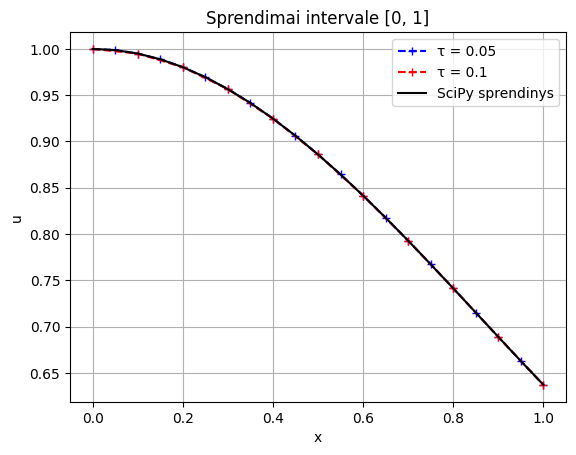

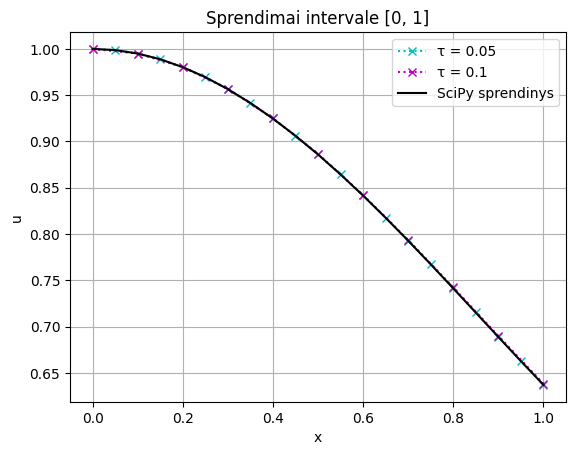

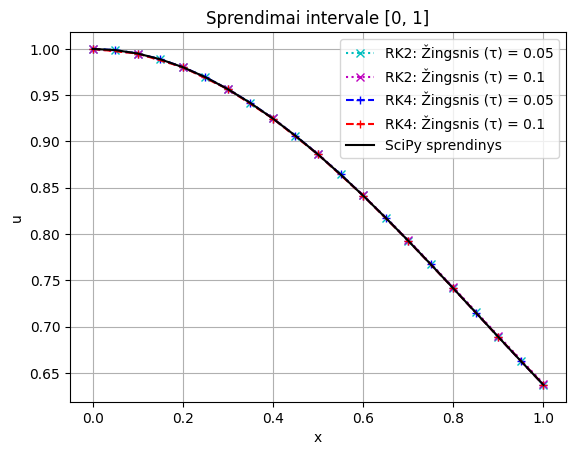

In [8]:
plt.plot(ts1, rk4_ys1, 'b--', marker='+', label='τ = 0.05')
plt.plot(ts2, rk4_ys2, 'r--', marker='+', label='τ = 0.1')
plt.plot(ts1, scipy1, color='black', label='SciPy sprendinys')
plt.xlabel('x')
plt.ylabel('u')
plt.title('Sprendimai intervale [0, 1]')
plt.legend()
plt.grid(True)
plt.savefig('rk4.png', dpi=300)
plt.show()

plt.plot(ts1, rk2_ys1, 'c:', marker='x', label='τ = 0.05')
plt.plot(ts2, rk2_ys2, 'm:', marker='x', label='τ = 0.1')
plt.plot(ts1, scipy1, color='black', label='SciPy sprendinys')
plt.xlabel('x')
plt.ylabel('u')
plt.title('Sprendimai intervale [0, 1]')
plt.legend()
plt.grid(True)
plt.savefig('rk2.png', dpi=300)
plt.show()

plt.plot(ts1, rk2_ys1, 'c:', marker='x', label='RK2: Žingsnis (τ) = 0.05')
plt.plot(ts2, rk2_ys2, 'm:', marker='x', label='RK2: Žingsnis (τ) = 0.1')
plt.plot(ts1, rk4_ys1, 'b--', marker='+', label='RK4: Žingsnis (τ) = 0.05')
plt.plot(ts2, rk4_ys2, 'r--', marker='+', label='RK4: Žingsnis (τ) = 0.1')
plt.plot(ts1, scipy1, color='black', label='SciPy sprendinys')
plt.xlabel('x')
plt.ylabel('u')
plt.title('Sprendimai intervale [0, 1]')
plt.legend()
plt.grid(True)
plt.savefig('all.png', dpi=300)
plt.show()

In [9]:
def error(y_tau, y_2tau, tau = 0.1, order = 2):
  y_tau  = np.array(y_tau)
  y_2tau = np.array(y_2tau[::2])
  # y_2tau_interpolated = np.interp(np.arange(0, len(y_tau)*tau, tau), np.arange(0, len(y_2tau)*2*tau, 2*tau), y_2tau)
  # print(y_2tau)
  # print(y_2tau_interpolated)

  return np.abs(y_2tau - y_tau) / (2**order - 1)

In [10]:
rk2_err = error(rk2_ys2, rk2_ys1, order = 2)
rk4_err = error(rk4_ys2, rk4_ys1, order = 4)

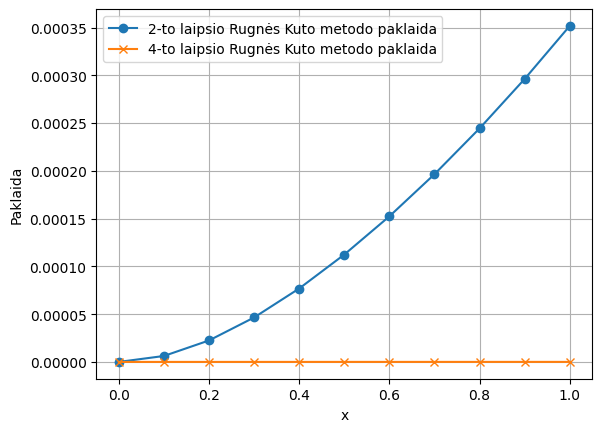

In [11]:
plt.plot(ts2, rk2_err, label='2-to laipsio Rugnės Kuto metodo paklaida', marker='o')
plt.plot(ts2, rk4_err, label='4-to laipsio Rugnės Kuto metodo paklaida', marker='x')

plt.xlabel('x')
plt.ylabel('Paklaida')
plt.legend()
plt.grid(True)
plt.savefig('error.png', dpi=300)
plt.show()